In [1]:
# Bag of Words(BoW) : 단어의 등장 순서를 고려하지 않는 빈도수 기반의 텍스트 데이터의 수치화 방법
# 가방에 단어들을 넣으면 순서가 중요하지 않음
# 각 단어에 고유한 인덱스를 부여하고
# 각 인덱스의 위치에 단어의 출현 횟수를 저장

from konlpy.tag import Okt
import re  

okt=Okt()  

token=re.sub("[.!#~]","",

             '비가 오니 마음이 차분해지네요. 요즘 너무 더웠어요. 비가 오니 마음이 기쁘네요.')

# 형태소 분석

token=okt.morphs(token)  
word2index={}  # 단어 사전(단어와 숫자 인덱스)

bow=[]  # 단어 가방(단어와 출현 횟수)

for voca in token:  
    # 사전에 없는 단어 추가

    if voca not in word2index.keys():  
        word2index[voca]=len(word2index)  
        # 단어의 인덱스와 출현횟수(기본값:1)
        bow.insert(len(word2index)-1,1)
    else:
        # 재등장하는 단어의 인덱스
        index=word2index.get(voca)
        # 단어 카운트 증가
        bow[index]=bow[index]+1

print(word2index)  

{'비': 0, '가': 1, '오니': 2, '마음': 3, '이': 4, '차분해지네요': 5, '요즘': 6, '너무': 7, '더웠어요': 8, '기쁘네요': 9}


In [2]:
# 단어의 출현 횟수

print(bow)

[2, 2, 2, 2, 2, 1, 1, 1, 1, 1]


In [3]:
from sklearn.feature_extraction.text import CountVectorizer

# 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩한 벡터를 만드는 클래스

corpus=['모처럼 전국에 비가 내리고 있습니다.']
line=['전국에 비가']

vector = CountVectorizer()
vector.fit(corpus)

print(vector.vocabulary_)
print(vector.transform(line).toarray()) # 단어가 출현한 위치에 출현빈도 표시

{'모처럼': 1, '전국에': 4, '비가': 2, '내리고': 0, '있습니다': 3}
[[0 0 1 0 1]]


In [4]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['''모처럼 전국에 비가 내리고 있습니다.

대부분 밤까지 계속되기 때문에 종일 우산이 필요하겠는데요.

비의 양도 많고 바람도 강하게 불기 때문에 작은 우산 말고 큰 우산 챙기는 게 더 좋습니다. ''']

# 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩한 벡터를 만드는 클래스

vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수 계산

# 단어들의 출현 횟수

print(vector.fit_transform(corpus).toarray())  

# 만들어진 단어와 인덱스

print(vector.vocabulary_)

[[1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1]]
{'모처럼': 7, '전국에': 18, '비가': 11, '내리고': 2, '있습니다': 16, '대부분': 3, '밤까지': 9, '계속되기': 1, '때문에': 4, '종일': 19, '우산이': 15, '필요하겠는데요': 22, '비의': 12, '양도': 13, '많고': 5, '바람도': 8, '강하게': 0, '불기': 10, '작은': 17, '우산': 14, '말고': 6, '챙기는': 21, '좋습니다': 20}


In [5]:
f=open('c:/data/text/news1.txt')

corpus=f.read()

txt=okt.nouns(corpus)

txt2=[' '.join(txt)]

txt2

['다음 달 경기도 성남시 공원 치킨 등 주문 드론 이 배달 서비스 시작 성남시 탄천 물놀이 이용 시민 편의 위해 드론 활용 배송 유료 서비스 전국 최초 시작 고 유료 드론 배송 곳 분당 탄천 내 금곡 공원 임시 물놀이 구미동 물놀이 등 곳 탄천 잔디 공원 구미동 반려견 놀이터 등 배달 점 곳 중앙 공원 내 드론 배달 거점 및 배달 점 곳 추가 설치 더 시민 이용 수 계획 성남시 유료 드론 배송 서비스 국토교통부 성장 계획 드론 배송 상용 표준 모델 마련 드론 배송 상용 추진단 계해 진행 사업 국토교통부 공모 사업인 드론 실증 도시 구축 사업 성남시 최종 선정 추진 드론 배달 점 설치 물놀이 포함 성남 시내 개 도심 물놀이 지난달 일제 개장 연인원 이용 대표 터 자리 잡고 음식점 편의점 등 편의 시설 접근성 상황 탄천 차량 오토바이 배송 경우 산책 시민 사고 위험 지역 드론 하천 위 길 비행 서비스 드론 전용 웹 사업자 제로 랩 홈페이지 통해 주문 물품 정자동 주택 전시관 내 드론 배달 거점 도착 드론 적재 후 물놀이 배달 점 제품 배달 점 상공 투하 방식 물품 전달 배송 소요 시간 이내 전망 주문 수 품목 치킨 피자 커피 등 간식 음료 방수 기저귀 튜브 등 물놀이 용품 응급처치 세트 등 배 송료 시 안전성 사업 확보 위해 드론 배송 지침 준수 운영 방침 신상진 성남시장 이번 배송 사업 도심 안 전국 최초 소비자 드론 배송 이용 료 지급 첫 사례 한국 도심 드론 배송 상용 서비스 표준 모델 제시 차 산업 특별시 로서 성남시 위상 공고 것 말']

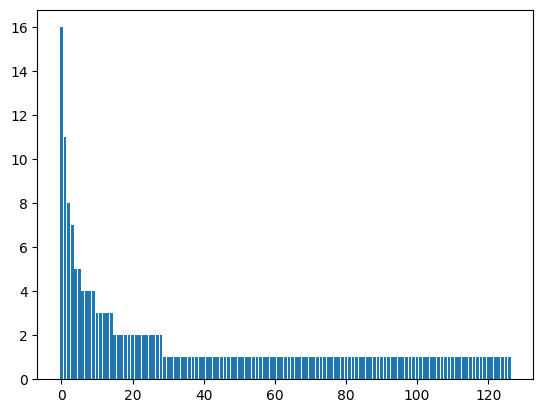

[('드론', 16), ('배송', 11), ('배달', 8), ('물놀이', 7), ('서비스', 5), ('성남시', 5), ('공원', 4), ('사업', 4), ('이용', 4), ('탄천', 4), ('시민', 3), ('주문', 3), ('유료', 3), ('상용', 3), ('도심', 3), ('물품', 2), ('모델', 2), ('전국', 2), ('설치', 2), ('최초', 2), ('치킨', 2), ('거점', 2), ('편의', 2), ('국토교통부', 2), ('위해', 2), ('구미동', 2), ('표준', 2), ('시작', 2), ('계획', 2), ('적재', 1), ('이내', 1), ('제품', 1), ('제시', 1), ('제로', 1), ('정자동', 1), ('이번', 1), ('전시관', 1), ('전용', 1), ('일제', 1), ('전망', 1), ('전달', 1), ('임시', 1), ('자리', 1), ('잔디', 1), ('잡고', 1), ('접근성', 1), ('간식', 1), ('지침', 1), ('준수', 1), ('홈페이지', 1), ('한국', 1), ('하천', 1), ('피자', 1), ('품목', 1), ('포함', 1), ('편의점', 1), ('특별시', 1), ('튜브', 1), ('투하', 1), ('주택', 1), ('통해', 1), ('추진단', 1), ('추진', 1), ('추가', 1), ('최종', 1), ('차량', 1), ('진행', 1), ('지역', 1), ('지난달', 1), ('지급', 1), ('중앙', 1), ('커피', 1), ('응급처치', 1), ('안전성', 1), ('음료', 1), ('사고', 1), ('비행', 1), ('분당', 1), ('방침', 1), ('방식', 1), ('방수', 1), ('반려견', 1), ('마련', 1), ('로서', 1), ('도착', 1), ('도시', 1), ('대표', 1), ('다음', 1), ('놀이터', 1

In [6]:
import numpy as np

import matplotlib.pyplot as plt

vect = CountVectorizer().fit(txt2)

# bow의 출현횟수 합계

cnt = vect.transform(txt2).toarray().sum(axis=0)

idx = np.argsort(-cnt) # 카운트 내림차순 정렬

cnt = cnt[idx]

# x축의 단어이름

feature_name = np.array(vect.get_feature_names_out())[idx]

plt.bar(range(len(cnt)), cnt)

plt.show()

print(list(zip(feature_name,cnt)))

In [7]:
# 불용어 추가

vector = CountVectorizer(stop_words=['더'])

print(vector.fit_transform(txt2).toarray())

print(vector.vocabulary_)

[[ 1  1  2  1  1  1  2  1  1  4  2  1  2  1  1  1  1  1  1  3  1 16  1  1
   2  7  2  1  1  1  1  8 11  1  1  1  1  4  1  1  1  1  1  3  1  5  1  2
   1  5  1  1  1  1  1  1  1  1  3  1  2  1  1  1  1  1  1  1  1  2  1  3
   1  1  1  1  1  4  1  1  1  1  1  1  2  1  1  1  1  1  1  1  1  1  3  1
   1  1  1  1  1  1  1  1  1  2  1  1  1  2  1  4  1  1  1  1  2  1  1  2
   1  1  1  1  1  1  1]]
{'다음': 16, '경기도': 3, '성남시': 49, '공원': 9, '치킨': 109, '주문': 94, '드론': 21, '배달': 31, '서비스': 45, '시작': 60, '탄천': 111, '물놀이': 25, '이용': 77, '시민': 58, '편의': 116, '위해': 69, '활용': 126, '배송': 32, '유료': 71, '전국': 84, '최초': 105, '분당': 33, '금곡': 13, '임시': 79, '구미동': 10, '잔디': 81, '반려견': 27, '놀이터': 15, '중앙': 97, '거점': 2, '추가': 106, '설치': 47, '계획': 6, '국토교통부': 12, '성장': 51, '상용': 43, '표준': 119, '모델': 24, '마련': 23, '추진단': 108, '계해': 5, '진행': 102, '사업': 37, '공모': 8, '사업인': 38, '실증': 62, '도시': 18, '구축': 11, '최종': 104, '선정': 46, '추진': 107, '포함': 118, '성남': 48, '시내': 57, '도심': 19, '지난달': 99, '일제': 78, '개장': 1, '연인원':